# **Analyzing Clients’ Yields to Understand myAgro’s Sales Pattern**
##### By Hejiang Wu, Husain Ghadiali, Kwan Wing Tuet, Mugdha Khairnar & Rohan Chaudhary

## Table of Contents
- Project Objective
- Data Source
- Motivation
- Dataset Description
- Importing & Merging data
- Data Cleaning & Filtering
- _Analysis 1_ : Is there a trend in the number of MyAgro packages distributed to farmers over time?
- _Analysis 2_ : Is there a pattern in the yield for each crop for subsequent years from the data available?
- _Analysis 3_ : Seeing the effect of trainings attended on the use of compost and yield
- _Analysis 4_ : Comparing sales of 2020 and 2021 based on highest average yield for each crop
- Conclusion
- References

## Project Objective/Proposal

MyAgro is a company that empowers the rural youth with job opportunities, increasing agricultural and economic growth. Our aim with this project is to explore the data of MyAgro’s clients to analyze their harvest across seasons, observe demographic patterns and understand their effect on the sales pattern of MyAgro. We will focus on clients with high yields in previous seasons and analyze if that resulted in an increase in sales of MyAgro packages in their respective regions in the following seasons.

## Data Source
MyAgro provided four datasets for this project. We have used their information for our analysis.
<img src="https://www.myagro.org/wp-content/uploads/2018/11/myagro-logo-rgb-300dpi-4-1366x1418.png"
     alt="myAgro"
     style="float: left; margin-right: 1px;" />

## Report Summary
In this project, our aim was to do an exploratory analysis on myAgro's dataset. We gained important insights about the business of myAgro and came up with a conclusion. We observed that the yield was affected by trainings attended and use of compost. We have also analysed the sales of myAgro packages to identify top zones and how the increase in prices of packages affected sales. At the end of the notebook, we have made recommendations for myAgro's team.

## Motivation
With an unparalleled focus on empowering farmers, myAgro is committed to reducing global poverty and hunger, while also encouraging agricultural and economic growth.
We are keen to work on this project to grasp a deeper understanding of the use of data analytics to solve a complex real-world problem that would make a difference in smallholder farmers' lives.

## Dataset Description
The dataset was given by myAgro. There are four datasets - clients, harvest, payment, and package. All these datasets were merged to find relations between various columns. 

**Client table:** This table contains the demographic data of myAgro's customers.

**Harvest table:** This table has yield and crop related data of myAgro's farmers. 

**Payment table:** This table shows us the payments made by the farmers to MyAgro for installments and packages.

**Package table:** This table tell us about payments ackages delivered every season, and rollover balance year over year. 

We have explained each column in detail in our notebook.

## Importing & Merging data

In this step, we are importing all the required libraries for our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clients_original = pd.read_csv('myagro_client.csv',low_memory=False)
clients_original.head()

,code,this_season_first_package_selection_date,enrollment_date,most_recent_year_enrolled,most_recent_year_delivered,sex,age,delivered_amount_this_season,is_certified_for_delivery,balance,...,this_season_packages,is_delivered_last_season,main_package,zone_code,district_name,country_name,ve_code,delivery_village_code,sl_code,fc_code
0,146455,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,0.0,...,NaN,False,NaN,UNS,NaN,Senegal,NaN,NaN,NaN,NaN
1,10681524,2022-08-24 00:00:00,2022-08-24T00:00:00.000Z,2023.0,2022.0,Male,45.0,0.0,False,109800.0,...,Sunflower Hybrid 0.5,True,Sunflower Hybrid - 0.5,KLW,NaN,Tanzania,NaN,TB543,NaN,NaN
2,2939199,2022-11-27 00:00:00,2022-11-27T00:00:00.000Z,2023.0,NaN,Female,34.0,0.0,False,2000.0,...,Arachide + Gombo 0.125,False,Arachide + Gombo - 0.125,KLD,Bougouni,Mali,KLD20,KE492,60520,40015
3,146470,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,0.0,...,NaN,False,NaN,UNS,NaN,Senegal,NaN,NaN,NaN,NaN
4,11556916,2022-11-27 00:00:00,2022-11-27T00:00:00.000Z,2023.0,NaN,Female,36.0,0.0,False,2000.0,...,Arachide + Gombo 0.125,False,Arachide + Gombo - 0.125,KLD,Bougouni,Mali,KLD20,KE492,60520,40015


The `clients` dataset is uploaded and we will drop less significant columns.

In [3]:
subset_columns_clients = ['code', 'delivered_amount_this_season', 'amount_enrolled_this_season','seniority','village_code','zone_code','country_name']
clients = clients_original[subset_columns_clients]
clients=clients.rename(columns={'code':'client_code'})
clients['client_code']=clients['client_code'].str.strip()
clients['client_code']=clients['client_code'].str.lstrip("0")

The following columns are considered for further analysis. The strip function was used to remove leading zeroes and spaces from `client_code` column. 

**code** : Human-readable unique identifier of the client

**delivered_amount_this_season** : The value of all the packages delivered to the client in CFA

**amount_enrolled_this_season** : The sum of the prices of all packages registered by the client this season

**seniority** : New clients are those that have never been delivered a package in the past. Returning clients have been delivered a package at least once in the past

**village_code** : Human-readable unique identifier of the village where the client is located

**zone_code** : Human-readable unique identifier of the zone where the client is located

**country_name** : Name of the country where the client is located

In [4]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494142 entries, 0 to 494141
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   client_code                   494142 non-null  object 
 1   delivered_amount_this_season  494142 non-null  float64
 2   amount_enrolled_this_season   494142 non-null  float64
 3   seniority                     494142 non-null  object 
 4   village_code                  494142 non-null  object 
 5   zone_code                     494142 non-null  object 
 6   country_name                  494142 non-null  object 
dtypes: float64(2), object(5)
memory usage: 26.4+ MB


This code gives us an overview of the dataset. Out of seven columns, five columns have _object_ as datatype and remaining two columns have _float_ values. 

In [5]:
harvest_original = pd.read_csv('myagro_harvest.csv',low_memory=False)
harvest_original.head()

,client_code,season,crop,farmer_total_hectares,myagro_seasons,age_over_30,field_geolocation,yield,planted_using_myagro_semoir,staff_measured_plot,...,module_4_attended,module_5_attended,trainings_attended,trainings_influence_rating,compost,compost_increased,myagro_vs_other_plots_rating,more_time_for_myagro_rating,harvest_result_rating,myagro_vs_nonmyagro_rating
0,2160586,2021,arachide,1.0,1.0,True,13.3535304 -7.9344277 443.35 9.64,0.788679,False,True,...,False,False,2.0,3.0,False,NaN,3.0,4.0,3.0,3.0
1,1105697,2021,arachide,0.5,2.0,True,11.1656241 -7.155164 424.19 5.36,1.822388,False,True,...,False,False,0.0,NaN,True,False,3.0,1.0,3.0,2.0
2,1094222,2021,arachide,1.0,3.0,True,12.3308983 -7.99085 381.09 6.9,0.634921,False,True,...,False,False,1.0,2.0,False,NaN,5.0,5.0,3.0,5.0
3,1670048,2021,mais,3.0,1.0,True,13.1080821 -6.6045361 0.0 3400.0,2.340037,False,True,...,False,False,2.0,3.0,False,NaN,3.0,3.0,3.0,3.0
4,1093588,2021,arachide,0.5,1.0,True,11.1105139 -7.1481548 394.47 5.36,1.854897,False,True,...,True,False,2.0,4.0,True,False,3.0,3.0,3.0,4.0


The `harvest` dataset is uploaded and we will drop less significant columns.

In [6]:
subset_columns_harvest = ['client_code','season','crop','farmer_total_hectares','yield','trainings_attended','compost','harvest_result_rating', 'trainings_influence_rating']
harvest = harvest_original[subset_columns_harvest]
harvest=harvest.rename(columns={'season':'season_harvest_data'})
harvest['client_code']=harvest['client_code'].astype(str)
harvest['client_code']=harvest['client_code'].str.strip()
harvest['client_code']=harvest['client_code'].str.lstrip("0")
harvest['season_harvest_data']= harvest['season_harvest_data'].astype(str)

The following columns are considered for further analysis. Datatype of `client_code` and `season_harvest_data` was changed as we will merge datasets. Again, the strip function was used to remove leading zeroes and spaces from `client_code` column.

**client_code** : Unique identifier of client

**season** : The season that the data was collected

**crop** : Crop type for which yield was measured

**farmer_total_hectares** : The total number of cultivatable hectares that the client owns

**yield** : Metric tons per hectare harvested

**trainings_attended** : The total number of training modules that the client participated in that season

**compost** : Client applied compost to the field that season

**harvest_result_rating** : How satisfied the farmer is with their myAgro plot harvest this season

**trainings_influence_rating** : The degree to which the farmer found the agricultural training content influencial on their actual agricultural practices

In [7]:
harvest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_code                 3181 non-null   object 
 1   season_harvest_data         3181 non-null   object 
 2   crop                        3181 non-null   object 
 3   farmer_total_hectares       3162 non-null   float64
 4   yield                       3181 non-null   float64
 5   trainings_attended          1894 non-null   float64
 6   compost                     2093 non-null   object 
 7   harvest_result_rating       1057 non-null   float64
 8   trainings_influence_rating  1610 non-null   float64
dtypes: float64(5), object(4)
memory usage: 223.8+ KB


This code gives us an overview of the dataset. Out of eight columns, four columns have _object_ as datatype and other four have _float_ values. 

In [8]:
payment_original = pd.read_csv('myagro_payment.csv',low_memory=False)
payment_original.head()

,payment_code,date_received,amount,is_rollover,is_audit,program,is_mobile_money,client_code,amount_enrolled,season
0,a0N5I00000ME5QhUAL,2021-11-17 08:23:42,2000.0,False,False,NaN,False,1943768,NaN,SN 2022
1,a0N0J00000OxuOiUAJ,2020-01-05 17:10:55,1000.0,False,False,NaN,False,1034664,NaN,ML 2020
2,a0N0J00000OxuPHUAZ,2020-01-05 17:11:34,1000.0,False,False,NaN,False,1034093,NaN,ML 2020
3,a0N0J00000OxuhkUAB,2020-01-05 17:16:28,1000.0,False,False,NaN,False,1034088,NaN,ML 2020
4,a0N0J00000OxumzUAB,2020-01-05 17:21:01,5000.0,False,False,NaN,False,1290956,NaN,ML 2020


The `payment` dataset is uploaded and we will drop less significant columns.

In [9]:
subset_columns_payment = ['date_received','amount','is_rollover','is_audit','program','client_code','season']
payment = payment_original[subset_columns_payment]
payment=payment.rename(columns={'season':'season_payment_data'})
payment['client_code']=payment['client_code'].str.strip()
payment['client_code']=payment['client_code'].str.lstrip("0")
payment['season_payment_data'] = payment['season_payment_data'].str.split().str[-1]

The following columns are considered for further analysis. The strip function was used to remove leading zeroes and spaces from `client_code` column. We are considering only year in the `season_payment_data` column to maintain uniformity across the dataset.

**client_code** : Human-readable identifier of the client who made the payment

**date_received** : The date and time that the payment was received

**amount** : The amount paid in CFA (Mali and Senegal) or TZS (Tanzania)

**is_rollover** : If true then this payment is the movement of the client's left over balance from last season to their balance for this season

**is_audit** : If true then this is an adjustment made internally, not a payment made by a client

**program** : This is used to categorize special types of payments, such as bonuses and rollover

**season** : The season in which the payment was made

In [10]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111954 entries, 0 to 4111953
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date_received        object 
 1   amount               float64
 2   is_rollover          bool   
 3   is_audit             bool   
 4   program              object 
 5   client_code          object 
 6   season_payment_data  object 
dtypes: bool(2), float64(1), object(4)
memory usage: 164.7+ MB


Here we get an overview of the dataset. Out of seven columns, four columns have object as datatype, two columns have _boolean_ values and one has _float_ values. 

In [11]:
package_original = pd.read_csv('myagro_package.csv',low_memory=False)
package_original.head()

,package_code,client_code,package_enrollment_date,price,product,hectares,is_delivered,created_date,delivered_date,season
0,a0K0J00000dAJHAUA4,1062398,NaN,33000.0,Mais HYB + Maraichage + Insecticide : Kabamano...,0.125,True,2019-05-24T00:00:00.000Z,NaN,ML 2019
1,a0K0J00000dAJHGUA4,1050799,NaN,17500.0,Arachide PDS + Maraichage : Arachide Sans Seme...,0.250,True,2019-05-24T00:00:00.000Z,NaN,ML 2019
2,a0K0J00000dAJHIUA4,35429,NaN,33000.0,Mais HYB + Maraichage + Insecticide : Kabamano...,0.125,True,2019-05-24T00:00:00.000Z,NaN,ML 2019
3,a0K0J00000dAJHKUA4,1063524,NaN,17500.0,Arachide PDS + Maraichage : Arachide Sans Seme...,0.250,True,2019-05-24T00:00:00.000Z,NaN,ML 2019
4,a0K0J00000dAJHNUA4,1066358,NaN,17500.0,Arachide PDS + Maraichage : Arachide Sans Seme...,0.250,True,2019-05-24T00:00:00.000Z,NaN,ML 2019


The `package` dataset is uploaded and we will drop less significant columns.

In [12]:
subset_columns_package = ['client_code','price','product','is_delivered','delivered_date','season']
package = package_original[subset_columns_package]
package=package.rename(columns={'season':'season_package_data'})
package['client_code']=package['client_code'].str.strip()
package['client_code']=package['client_code'].str.lstrip("0")
package['season_package_data'] = package['season_package_data'].str.split().str[-1]

The following columns are considered for further analysis. The strip function was used to remove leading zeroes and spaces from `client_code` column. We are considering only year in the `season_package_data` column to maintain uniformity across the dataset.

**client_code** : Human-readable unique identifier of the client who registered the package

**price** : The price of the package

**product** : The name of the product included in the package

**is_delivered** : Whether or not the package was delivered to the client

**delivered_date** : Date on which the package was delivered

**season** : The season in which the package was registered

In [13]:
package.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610343 entries, 0 to 610342
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   client_code          610343 non-null  object 
 1   price                610341 non-null  float64
 2   product              610343 non-null  object 
 3   is_delivered         610343 non-null  bool   
 4   delivered_date       90023 non-null   object 
 5   season_package_data  610343 non-null  object 
dtypes: bool(1), float64(1), object(4)
memory usage: 23.9+ MB


This code gives us an overview of the dataset. Out of six columns, three columns have _object_ as datatype, one column has _boolean_ values and one has _float_ values. 

## Data Cleaning & Filtering
We reviewed all the fields that were included in the four datasets for our research and focused on a few, leaving out others.
Our rationale to eliminate certain fields was based on the following :

1. Large number of null values
2. Irrelevance towards our analysis (Since our analysis revolves around sales and yield, we retained the variables that are associated and relevant to our analysis)
3. Values present for the variables in the dataset (certain variables consist of values derived from surveys and other means that depend on subjective metrics which are not reliable for the analysis, as discussed with the client).

Based on the dataset and the client's perspective, we have removed Tanzania from the list of countries for our project due to a lack of data for that nation.

In [14]:
df_client_payment=pd.merge(clients,payment, how='inner',on=['client_code'])

*Rationale*: We are merging **client** and **payment** dataset using an inner join for further analysis.

In [15]:
df_client_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119695 entries, 0 to 4119694
Data columns (total 13 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   client_code                   object 
 1   delivered_amount_this_season  float64
 2   amount_enrolled_this_season   float64
 3   seniority                     object 
 4   village_code                  object 
 5   zone_code                     object 
 6   country_name                  object 
 7   date_received                 object 
 8   amount                        float64
 9   is_rollover                   bool   
 10  is_audit                      bool   
 11  program                       object 
 12  season_payment_data           object 
dtypes: bool(2), float64(3), object(8)
memory usage: 385.0+ MB


In [16]:
#Checking data for seasons available in various files
print("Harvest data available for seasons: " ,harvest.season_harvest_data.unique())
print("Package data available for seasons: ",package.season_package_data.unique())
print("Payment data available for seasons: ",payment.season_payment_data.unique())

Harvest data available for seasons:  ['2021' '2020' '2022']
Package data available for seasons:  ['2019' '2022' '2021' '2020' '2023' '2013' '2014' '2015' '2016' '2017'
 '2018' '2012']
Payment data available for seasons:  ['2022' '2020' '2023' '2021' '2016' '2017' '2018' '2019' '2015' '2014'
 '2013' '2012' nan]


_Rationale_ : In the code block above, we are checking the data for `season` column in various files

In [17]:
df_client_package=pd.merge(clients,package, how='inner',on=['client_code'])

*Rationale*: We are merging **client** and **package** dataset using an inner join for further analysis.

In [18]:
df_client_package.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613310 entries, 0 to 613309
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   client_code                   613310 non-null  object 
 1   delivered_amount_this_season  613310 non-null  float64
 2   amount_enrolled_this_season   613310 non-null  float64
 3   seniority                     613310 non-null  object 
 4   village_code                  613310 non-null  object 
 5   zone_code                     613310 non-null  object 
 6   country_name                  613310 non-null  object 
 7   price                         613309 non-null  float64
 8   product                       613310 non-null  object 
 9   is_delivered                  613310 non-null  bool   
 10  delivered_date                88077 non-null   object 
 11  season_package_data           613310 non-null  object 
dtypes: bool(1), float64(3), object(8)
memory usa

In [19]:
df_client_package=df_client_package[df_client_package['country_name']!='Tanzania']

_Rationale_ : As mentioned above, we are removing data for Tanzania from our dataset as there are few data points to analyse anything.

In [20]:
df_client_package=df_client_package.sort_values(by='season_package_data')

## Analysis 1: Is there a trend in the number of MyAgro packages distributed to farmers over time? How do the two major countries compare with one another?

In [21]:
#Sale of packages over time for Mali and Senegal for each season
package_delivered=df_client_package[(df_client_package['country_name']!='Tanzania')&(df_client_package['season_package_data']!='2023')].groupby(['country_name','season_package_data'])['is_delivered'].count()
print(package_delivered)

country_name  season_package_data
Mali          2012                     287
              2013                    2973
              2014                    6340
              2015                   10394
              2016                   23155
              2017                   34936
              2018                   28371
              2019                   28335
              2020                   54122
              2021                   70128
              2022                   45466
Senegal       2012                     285
              2013                    1854
              2014                    1930
              2015                    3861
              2016                    4612
              2017                   18579
              2018                   16169
              2019                   19117
              2020                   32742
              2021                   45595
              2022                   41877
Name: is_delivered, 

**Observation** : We can observe that, overall, the number of packages delivered has increased over the years, even after considering the variances between consecutive seasons.

In [22]:
package_delivered1=df_client_package[(df_client_package['season_package_data']!='2023')].groupby(['season_package_data','country_name'])['is_delivered'].count()

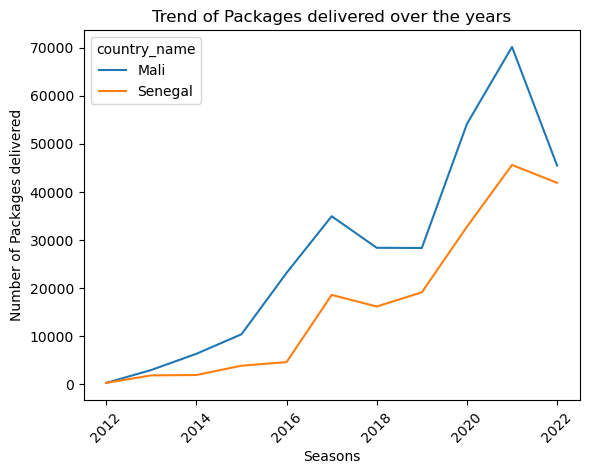

In [23]:
package_delivered1.unstack().plot()
plt.title('Trend of Packages delivered over the years')
plt.xticks(rotation=45)
plt.xlabel("Seasons")
plt.ylabel("Number of Packages delivered")
plt.show()

**Observation** : The line graph, which was created to study the trend of MyAgro product sales over the seasons since the firm began its operations, demonstrates a strong positive trend of an increase in the number of packages delivered over the years. During the pandemic period from 2019 to 2021, the number goes up.

However, we see a significant drop in package delivery in 2022 compared compared to 2021, hence let us explore a possible reason for this by comparing package prices in the two years.

##### Comparing the pricing of packages that were popular in the two years from 2021 to 2022

In [24]:
packages_2021= package[package.season_package_data == '2021']['product'].unique()

In [25]:
packages_2022= package[package.season_package_data == '2022']['product'].unique()

In [26]:
commeon_packages=np.intersect1d(packages_2021, packages_2022)

In [27]:
price_compare=package[(package['product'].isin(list(commeon_packages)))&(package['season_package_data'].isin(['2021','2022']))].groupby(['product','season_package_data'])['price'].mean().reset_index()
price_compare

,product,season_package_data,price
0,1/8 Arachide + Gombo,2021,12000.000000
1,1/8 Arachide + Gombo,2022,21000.000000
2,Bissap,2021,13000.000000
3,Bissap,2022,14056.818182
4,Gombo,2021,6500.332757
5,Gombo,2022,13174.701752
6,Pasteque,2021,13000.000000
7,Pasteque,2022,14436.922061


##### Visualizing the increase in price

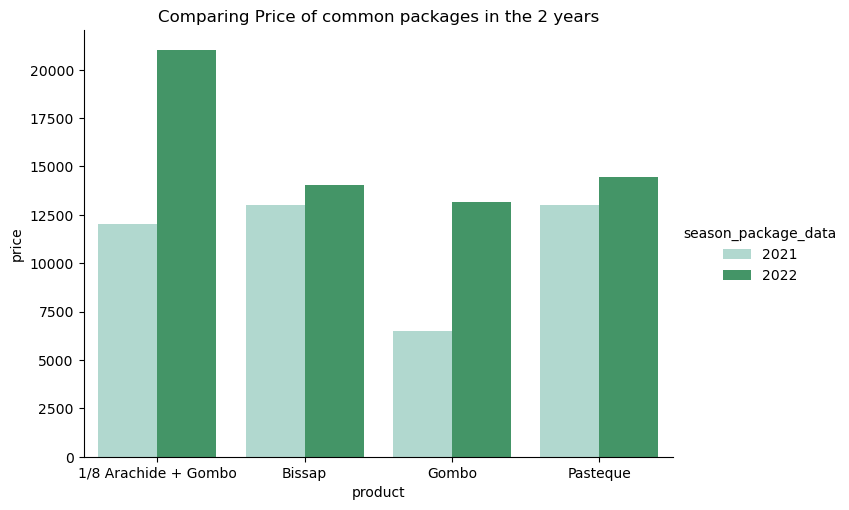

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
ax=sns.catplot(data=price_compare,x='product',y='price',hue='season_package_data',kind='bar', palette= 'BuGn',aspect=11.7/8.27).set(title='Comparing Price of common packages in the 2 years')

**Observation** : It can be observed that the potential reason for the fall in the package delivery could be due to less packages registered by clients in 2022 as a result of the increase in prices of packages. Further research shows us that as per World Bank Records, Fertilizer prices have risen nearly 30% since the start of 2022. As per our conversation with MyAgro, they have validated that the price rise has led to a decrease in the sales 

In [29]:
df_client_harvest=pd.merge(clients,harvest, how='inner',on=['client_code'])

*Rationale*: We are merging **client** and **harvest** dataset using an inner join for further analysis.

In [30]:
#Removing data for the country Tanzania 
df_client_harvest=df_client_harvest[df_client_harvest['country_name']!='Tanzania']

##### Let us have a look at the categories of crops planted by MyAgro Clients in each of countries Mali and Senegal

In [31]:
harvest.crop.unique()

array(['arachide', 'mais', 'sorgho', 'riz', 'mil'], dtype=object)

In [32]:
df_client_harvest.groupby(['country_name','crop'])['client_code'].count()

country_name  crop    
Mali          arachide    529
              mais        373
              riz         246
              sorgho      614
Senegal       arachide    447
              mais        431
              mil         301
              riz         208
              sorgho       32
Name: client_code, dtype: int64

The two neighbouring countries seem to have the similar plantation of crops with aracide and mais being the most popular crops. As per available data Millet is predominantly grown by MyAgro clients in Senegal 

In [33]:
df_country_crop_count = df_client_harvest.groupby(['country_name','crop'])['client_code'].agg(['count']).reset_index()

In [34]:
mali = df_country_crop_count[df_country_crop_count['country_name']=='Mali']
Senegal = df_country_crop_count[df_country_crop_count['country_name']=='Senegal']

(-1.117983584507166,
 1.205011866852027,
 -1.1169219015849656,
 1.1488155196939585)

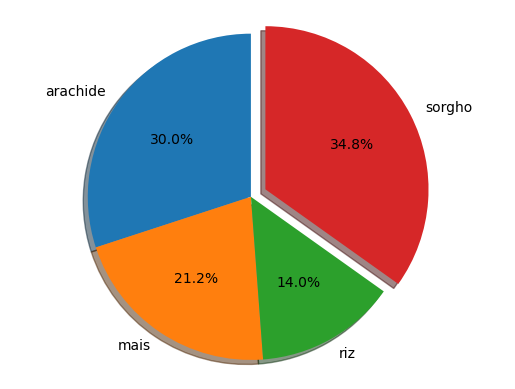

In [35]:
labels_mali = list(mali['crop'].unique())
sizes_mali = [529, 373, 246, 614]
explode = (0, 0, 0, 0.1)  # only "explode" the
fig1, ax1 = plt.subplots()
ax1.pie(sizes_mali, explode=explode, labels=labels_mali, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

**Observation**: We analyze the proportion of the farmers that plant each crop in Mali. This gives the list of crops in order of which ones are being planted the most in Mali.
We observe that Sorgho is the highest crop planted in Mali.

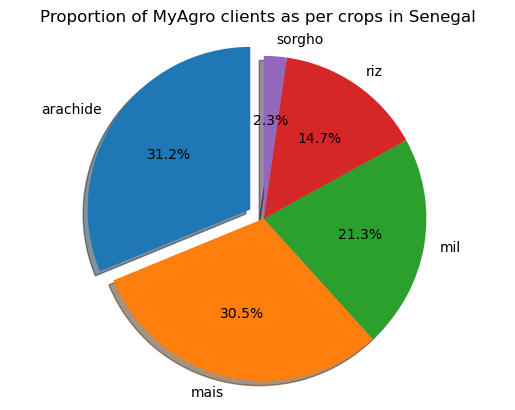

In [36]:
labels_Senegal = list(Senegal['crop'].unique())
sizes_Senegal = [441, 431, 301, 208, 32]
explode2 = (0.1, 0, 0, 0, 0)
fig2, ax2 = plt.subplots()
ax2.pie(sizes_Senegal, explode=explode2, labels=labels_Senegal, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of MyAgro clients as per crops in Senegal')
plt.show()

**Observation** : We do much the same for Senegal to give us the equivalent insight for the country of Senegal.
In Senegal, observe that Arachide is the most planted crop in Senegal.

## Analysis 2: Is there a pattern in the yield for each crop for subsequent years from the data available?

In [37]:
pd.pivot_table(df_client_harvest, index=['country_name','crop'], columns=['season_harvest_data'],values='yield',aggfunc=np.mean)

season_harvest_data        2020      2021      2022
country_name crop                                  
Mali         arachide  1.289778  1.178595  1.535663
             mais      2.933179  2.894741  2.920511
             riz       1.817500  3.412893  2.050649
             sorgho    1.888269  2.144288  1.424756
Senegal      arachide  2.326535  2.330451  1.857358
             mais      1.905610  1.986940  2.114908
             mil       1.026316  1.013783  0.612751
             riz       3.505455  1.989351  2.423667
             sorgho    1.309167  1.061028       NaN

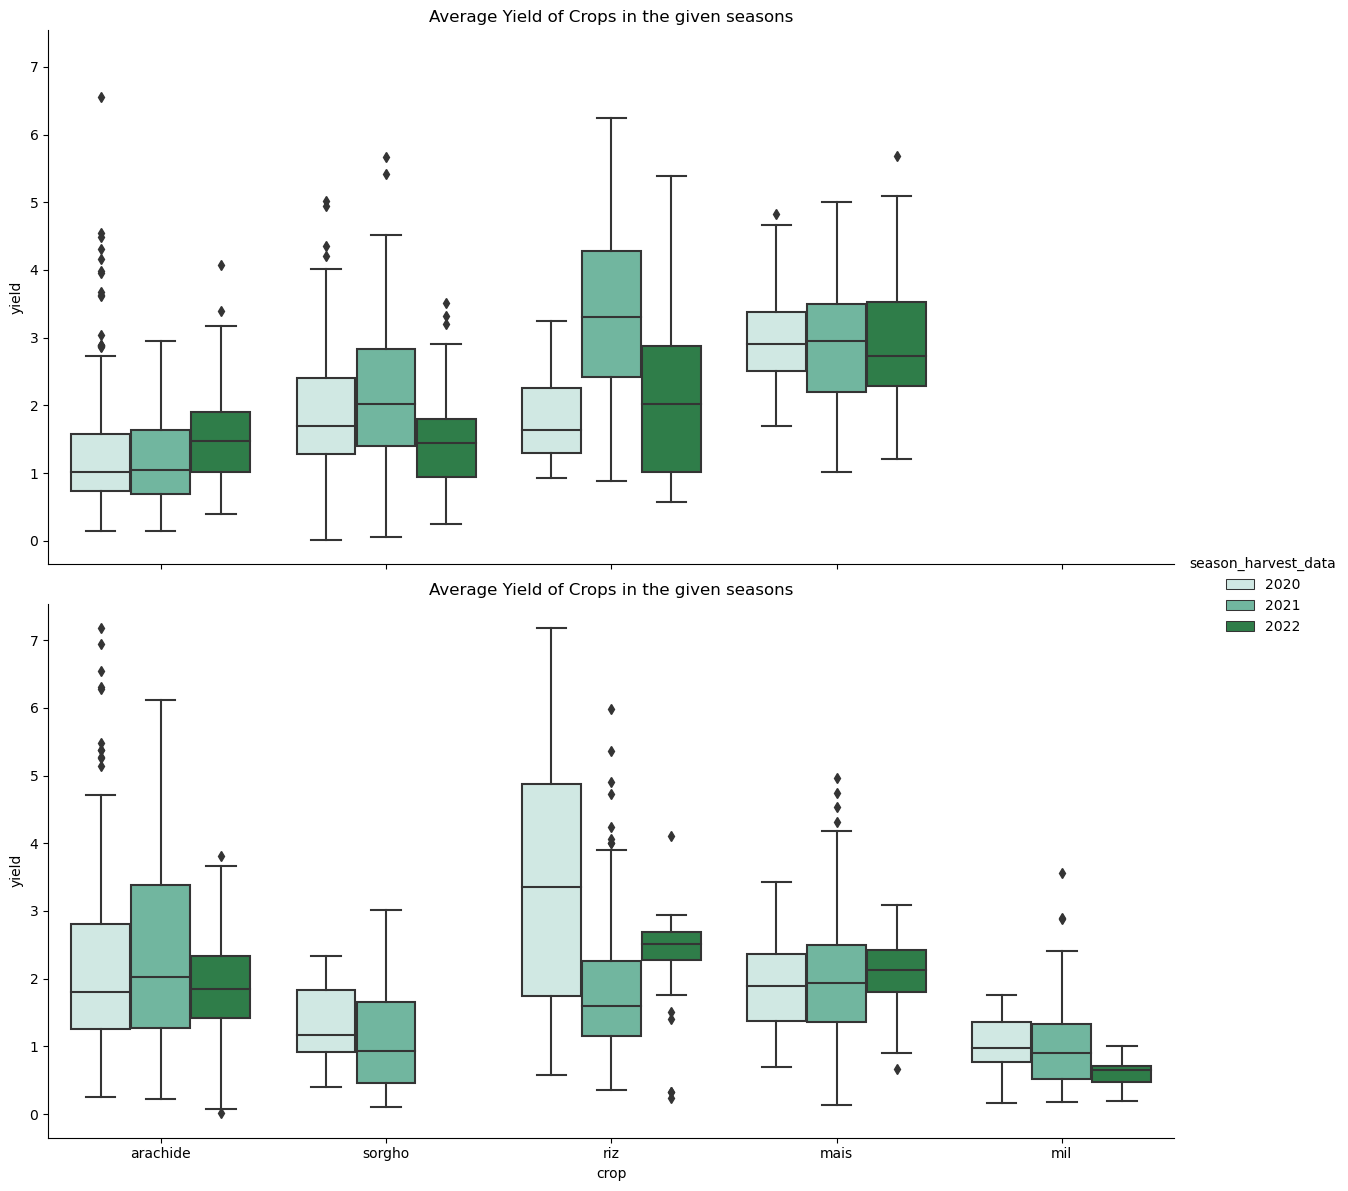

In [38]:
sns.catplot(x='crop', y='yield', kind='box', data=df_client_harvest, height=6, aspect=2, hue = "season_harvest_data" , row= 'country_name', row_order = ['Mali', 'Senegal'], palette='BuGn', hue_order = ['2020','2021','2022']).set(title='Average Yield of Crops in the given seasons')

**Observations**
- Archide

For Archide, in Mali, we see a slight decrease in 2021 for the average yield, as compared to 2020 and then a slight increase in 2022.
In Senegal, the average yield remained almost the same and then decreased in 2022.

- Mais

For Mais, there was no significant difference in the average yield throughout the 3 years in Mali.
On the other hand, Senegal saw a constant increase in the average yield through the 3 years.

- Riz

Riz saw a significant increase in the average yield in 2021 as compared to 2020, and then a slight decrease in 2022 in Mali.
In Senegal, Riz decreased in 2021, and then increased slightly in the following year.

- Sorgho

Sorgho saw an increase in the average yield in 2021 over 2020 in Mali. In the following year there was a significant decrease.
In Senegal there was a slight decrease in 2021. The following year had no data.

- Mil

Mil has no data for the three years in Mali.
For Senegal, Mil remained constant through 2020 and 2021, and decreased in the following year.

## Analysis 3: Does the number of training sessions attended contribute towards the increase in use of compost?

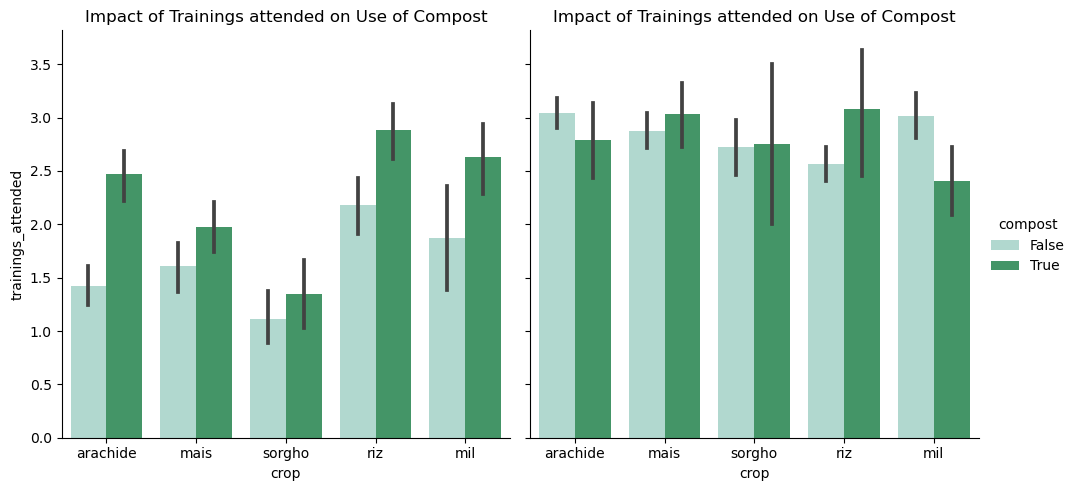

In [39]:
#Analyzing the impact of number of trainings attended on the compost applied by farmers
sns.catplot(data=harvest, x='crop',y="trainings_attended", col = "season_harvest_data"  , hue ='compost', palette= 'BuGn', col_order = ['2021','2022'], kind='bar').set(title='Impact of Trainings attended on Use of Compost')

**Observation** :We observe that as the training count increases, there does not seem to be a significant relation with the use of compost. The majority of farmers that did attend the 5th training session used compost.

### Do these trainings cause an increase in yield for each crop?

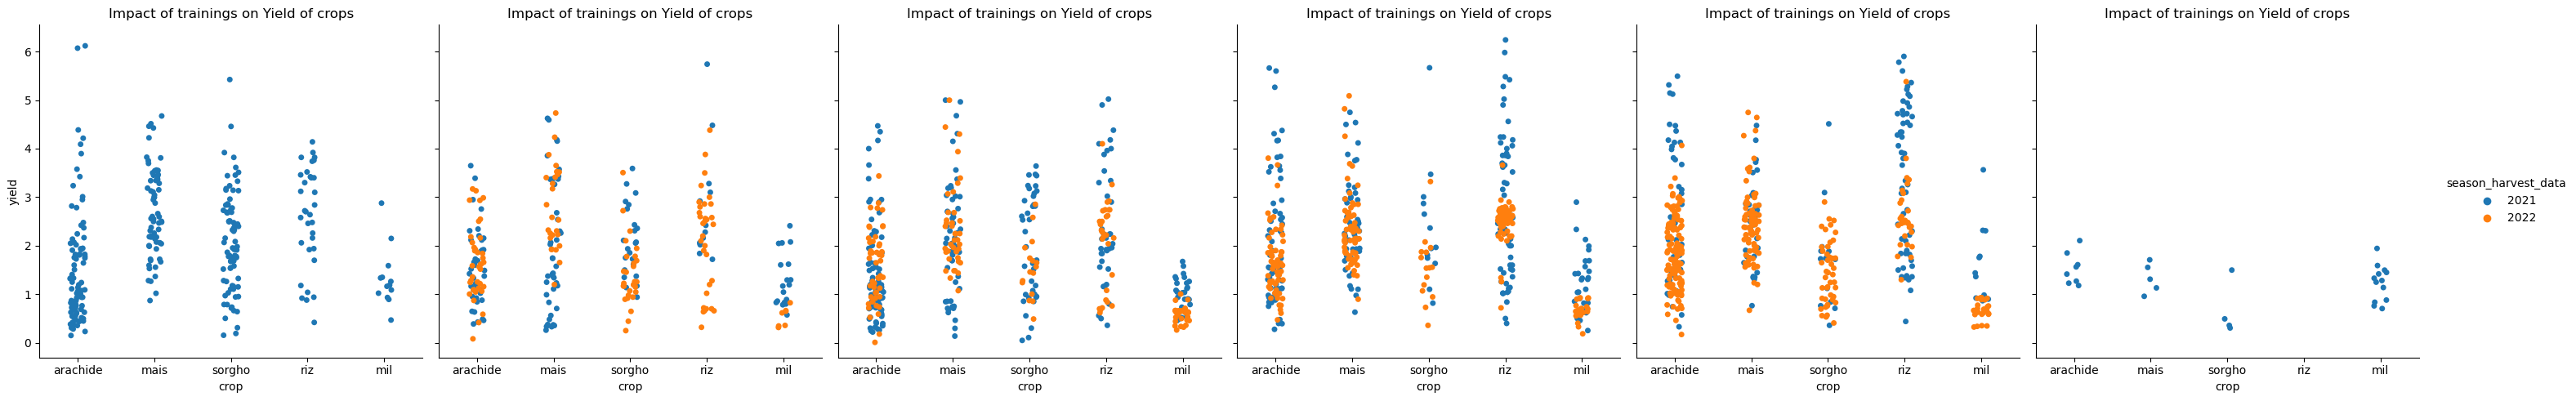

In [40]:
sns.catplot(data=harvest, x='crop',y="yield", hue = "season_harvest_data", col = 'trainings_attended', hue_order = ['2021','2022'], kind = 'strip', jitter = True).set(title='Impact of trainings on Yield of crops')

We do not see an increase in the yield of the crops based on the use of compost.

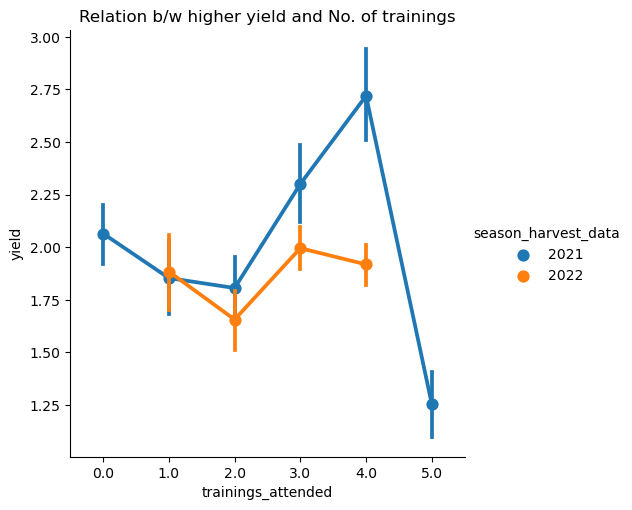

In [41]:
sns.catplot(data=harvest, x='trainings_attended',y="yield", hue = "season_harvest_data", hue_order = ['2021','2022'], kind = 'point').set(title='Relation b/w higher yield and No. of trainings')

This graph gives us an overview of the effect of the trainings on the overall yield for both years, 2021 and 2022.

In all, we conclude based on the analysis that the trainings do not cause much of an increase in the yield.

### Is there any relationship between trainings attended and training influence ratings given by the farmers?

In [42]:
pd.pivot_table(harvest,index=['season_harvest_data','trainings_attended'],columns=['trainings_influence_rating'],values='client_code',aggfunc='count')

trainings_influence_rating              1.0   2.0   3.0    4.0    5.0
season_harvest_data trainings_attended                               
2021                1.0                 5.0  18.0  44.0   43.0   24.0
                    2.0                 5.0  18.0  86.0   79.0   53.0
                    3.0                 1.0   3.0  44.0   65.0   99.0
                    4.0                 3.0   4.0  11.0   27.0  111.0
                    5.0                 NaN   NaN   2.0    5.0   23.0
2022                1.0                 NaN   2.0  59.0   37.0   33.0
                    2.0                 1.0   2.0  32.0   63.0   68.0
                    3.0                 2.0   1.0  20.0  101.0  116.0
                    4.0                 1.0   NaN  30.0   90.0  179.0

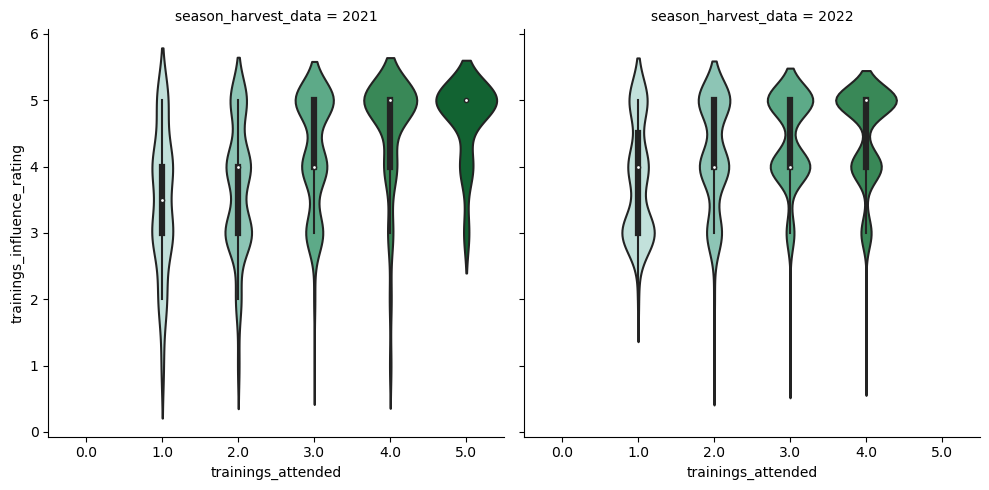

In [43]:
sns.catplot(data=harvest, x="trainings_attended", y="trainings_influence_rating",col='season_harvest_data',col_order=['2021','2022'],kind='violin', palette='BuGn', legend=False)

**Observation** : We can see that farmers who attended more trainings gave a higher rating which means that farmers have a higher degree to which the they found the agricultural training content influencial on their actual agricultural practices

The map visualization provides us an insight into the different zones MyAgro currently provides services to.

In [44]:
lat=harvest_original['field_geolocation'].str.split().str[0]
lon=harvest_original['field_geolocation'].str.split().str[1]
lat=lat.apply(pd.to_numeric, errors='coerce')
lon=lon.apply(pd.to_numeric, errors='coerce')

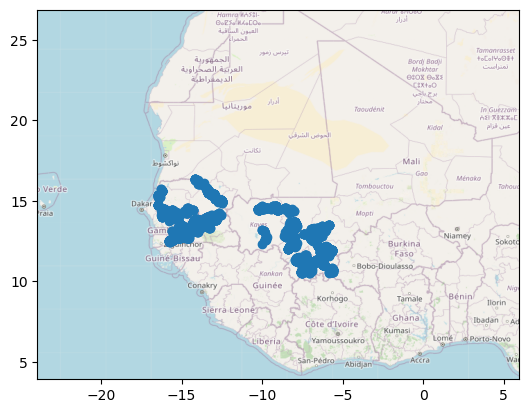

In [45]:
import matplotlib.pyplot as plt

# The boundaries of the image map
map_box = [-23.950, 5.933, 3.910, 26.865]
# The name of the image of the New York map might be different.
map_img = plt.imread('map_senegal.png')
fig, ax = plt.subplots()
ax.scatter(lon, lat)
ax.set_ylim(map_box[2], map_box[3])
ax.set_xlim(map_box[0], map_box[1])
ax.imshow(map_img, extent=map_box, alpha=0.9)

plt.savefig("mad_mod.png")
plt.show()

## Analysis 4: Comparing the sales(pacakges delivered) of 2020 with 2021 based on the highest average yield for each crop in 2020.

Analysis for the crop Mais

In [46]:
# Get a dataframe containing harvest and client related data in 2020 for Mais
df_ch_2020 = df_client_harvest[(df_client_harvest['season_harvest_data'] == '2020')]
df_ch_2020_mais = df_ch_2020[df_ch_2020['crop'] == 'mais']

In [47]:
# Get the average yield in 2020 for each zone for mais and filter out top 3 yielding zones
top_yield_zones_mais=df_ch_2020_mais.groupby('zone_code')['yield'].mean().sort_values(ascending=False).head(3)
top_yield_zones_mais

zone_code
KOL    3.148077
BRL    3.100000
FAN    2.979444
Name: yield, dtype: float64

In [48]:
#Calculate the sales in packages for these 
df_zone_package_mais = df_client_package[(df_client_package['is_delivered']==True)&(df_client_package['season_package_data'].isin(['2020','2021']))&(df_client_package['zone_code'].isin(['KOL','BRL','FAN']))].groupby(['zone_code','season_package_data'])['is_delivered'].agg(['count'])
df_zone_package_mais

count
zone_code season_package_data       
BRL       2020                  2587
          2021                  3310
FAN       2020                  2482
          2021                  3528
KOL       2020                  2710
          2021                  3934

In [49]:
df_zone_package_mais_sales= pd.pivot_table(df_zone_package_mais,index=['zone_code'],columns=['season_package_data'],values='count')

In [50]:
df_zone_package_mais_sales

season_package_data,2020,2021
zone_code,,
BRL,2587,3310
FAN,2482,3528
KOL,2710,3934


In [51]:
#Calculating the percentage increase in sales from 2020 to 2021
df_zone_package_mais_sales['% increase of sale'] = ((df_zone_package_mais_sales['2021'] - df_zone_package_mais_sales['2020'])/df_zone_package_mais_sales['2020'])*100
df_zone_package_mais_sales

season_package_data,2020,2021,% increase of sale
zone_code,,,
BRL,2587,3310,27.947429
FAN,2482,3528,42.143433
KOL,2710,3934,45.166052


Sorgho Analysis

In [52]:
sorgho_20 = df_ch_2020[df_ch_2020['crop']=='sorgho']

In [53]:
sorgho_20.groupby('zone_code')['yield'].mean().sort_values(ascending=False).head(3)

zone_code
FAN    2.379265
BRL    2.322113
MYF    1.830000
Name: yield, dtype: float64

In [54]:
df_zone_package_sorgho = df_client_package[(df_client_package['is_delivered']==True)&(df_client_package['season_package_data'].isin(['2020','2021']))&(df_client_package['zone_code'].isin(['FAN','BRL','MYF']))].groupby(['zone_code','season_package_data'])['is_delivered'].agg(['count'])
df_zone_package_sorgho

count
zone_code season_package_data       
BRL       2020                  2587
          2021                  3310
FAN       2020                  2482
          2021                  3528
MYF       2020                   731
          2021                   660

In [55]:
df_zone_package_sorgho_sales = pd.pivot_table(df_zone_package_sorgho,index=['zone_code'],columns=['season_package_data'],values='count')

In [56]:
df_zone_package_sorgho_sales['% increase of sale'] = ((df_zone_package_sorgho_sales['2021'] - df_zone_package_sorgho_sales['2020'])/df_zone_package_sorgho_sales['2020'])*100
df_zone_package_sorgho_sales

season_package_data,2020,2021,% increase of sale
zone_code,,,
BRL,2587,3310,27.947429
FAN,2482,3528,42.143433
MYF,731,660,-9.712722


Arachide

In [57]:
arachide_20 = df_ch_2020[df_ch_2020['crop']=='arachide']

In [58]:
arachide_20_yield = arachide_20.groupby('zone_code')['yield'].mean().sort_values(ascending =False).head(3)
arachide_20_yield

zone_code
VLN    3.455333
MYF    2.574000
TAM    2.426250
Name: yield, dtype: float64

In [59]:
arachide_20_top3zone_package = df_client_package[(df_client_package['is_delivered']==True)&(df_client_package['season_package_data'].isin(['2020','2021']))&(df_client_package['zone_code'].isin(['VLN','TAM','MYF']))].groupby(['zone_code','season_package_data'])['is_delivered'].agg(['count'])
arachide_20_top3zone_package

count
zone_code season_package_data       
MYF       2020                   731
          2021                   660
TAM       2020                  1575
          2021                  2744
VLN       2020                  1400
          2021                  1455

In [60]:
df_zone_package_arachide_sales = pd.pivot_table(arachide_20_top3zone_package,index=['zone_code'],columns=['season_package_data'],values='count')

In [61]:
df_zone_package_arachide_sales['% increase of sale'] = ((df_zone_package_arachide_sales['2021'] - df_zone_package_arachide_sales['2020'])/df_zone_package_arachide_sales['2020'])*100
df_zone_package_arachide_sales

season_package_data,2020,2021,% increase of sale
zone_code,,,
MYF,731,660,-9.712722
TAM,1575,2744,74.222222
VLN,1400,1455,3.928571


Mil

In [62]:
df_ch_2020_mil = df_ch_2020[df_ch_2020['crop']=='mil']

In [63]:
# Get the average yield in 2020 for each zone for mil
df_ch_2020_mil.groupby('zone_code')['yield'].mean().sort_values(ascending=False).head(3)

zone_code
KOU    1.293750
MBA    1.231667
TAM    0.913333
Name: yield, dtype: float64

In [64]:
df_zone_package_mil = df_client_package[(df_client_package['is_delivered']==True)&(df_client_package['season_package_data'].isin(['2020','2021']))&(df_client_package['zone_code'].isin(['KOU','MBA','TAM']))].groupby(['zone_code','season_package_data'])['is_delivered'].agg(['count'])
df_zone_package_mil

count
zone_code season_package_data       
KOU       2020                  1710
          2021                  2974
MBA       2020                  1017
          2021                   933
TAM       2020                  1575
          2021                  2744

In [65]:
df_zone_package_mil_sales= pd.pivot_table(df_zone_package_mil,index=['zone_code'],columns=['season_package_data'],values='count')
df_zone_package_mil_sales

season_package_data,2020,2021
zone_code,,
KOU,1710,2974
MBA,1017,933
TAM,1575,2744


In [66]:
df_zone_package_mil_sales['% increase of sale'] = ((df_zone_package_mil_sales['2021'] - df_zone_package_mil_sales['2020'])/df_zone_package_mil_sales['2020'])*100
df_zone_package_mil_sales

season_package_data,2020,2021,% increase of sale
zone_code,,,
KOU,1710,2974,73.918129
MBA,1017,933,-8.259587
TAM,1575,2744,74.222222


Rice

In [67]:
df_ch_2020_rice = df_ch_2020[df_ch_2020['crop']=='riz']

In [68]:
# Get the average yield in 2020 for each zone for mil
df_ch_2020_rice.groupby('zone_code')['yield'].mean().sort_values(ascending=False).head(3)

zone_code
KLA    3.865000
MYF    2.546667
KAD    1.817500
Name: yield, dtype: float64

In [69]:
df_zone_package_rice = df_client_package[(df_client_package['is_delivered']==True)&(df_client_package['season_package_data'].isin(['2020','2021']))&(df_client_package['zone_code'].isin(['KLA','MYF','KAD']))].groupby(['zone_code','season_package_data'])['is_delivered'].agg(['count'])
df_zone_package_rice

count
zone_code season_package_data       
KAD       2020                  3080
          2021                  3496
KLA       2020                   694
          2021                   478
MYF       2020                   731
          2021                   660

In [70]:
df_zone_package_rice_sales= pd.pivot_table(df_zone_package_rice,index=['zone_code'],columns=['season_package_data'],values='count')
df_zone_package_rice_sales

season_package_data,2020,2021
zone_code,,
KAD,3080,3496
KLA,694,478
MYF,731,660


In [71]:
df_zone_package_rice_sales['% increase of sale'] = ((df_zone_package_rice_sales['2021'] - df_zone_package_rice_sales['2020'])/df_zone_package_rice_sales['2020'])*100
df_zone_package_rice_sales

season_package_data,2020,2021,% increase of sale
zone_code,,,
KAD,3080,3496,13.506494
KLA,694,478,-31.123919
MYF,731,660,-9.712722


Top zones for ALL crops combined: BRL,FAN,KOL,MYF,TAM,VLN,KOU,MBA,KLA,KAD

In [72]:
df_10zones_yield = df_client_harvest[(df_client_harvest['zone_code'].isin(['BRL','FAN','KOL','MYF','TAM','VLN','KOU','MBA','KLA','KAD']))&(df_client_harvest['season_harvest_data']!='2022')].groupby(['zone_code','crop','season_harvest_data'])['yield'].agg(['mean'])

In [73]:
df_10zones_yield=df_10zones_yield.reset_index()
df_10zones_yield.head()

,zone_code,crop,season_harvest_data,mean
0,BRL,arachide,2020,1.254054
1,BRL,arachide,2021,0.814827
2,BRL,mais,2020,3.100000
3,BRL,mais,2021,2.223252
4,BRL,sorgho,2020,2.322113


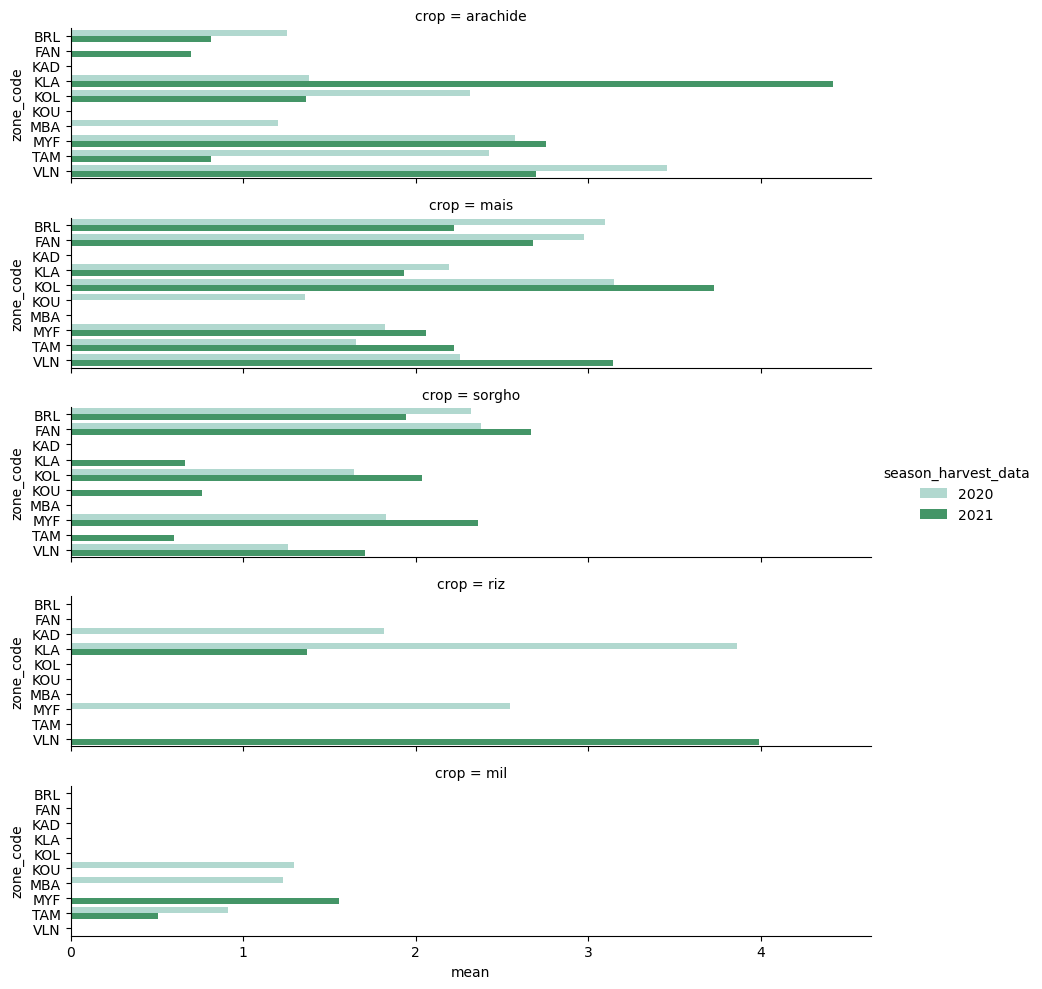

In [74]:
sns.catplot(y='zone_code', x="mean", row="crop", kind="bar", hue ='season_harvest_data', palette= 'BuGn', data=df_10zones_yield, height=2, aspect=4.5, orient='h')

We see the change in the mean yield for each zone over the two years.
We observe that certain crops in certain zones perform exceptionally well while others not as much.

In [75]:
zonal_increase=pd.concat([df_zone_package_arachide_sales , df_zone_package_mais_sales, df_zone_package_sorgho_sales, df_zone_package_rice_sales, df_zone_package_mil_sales ]).drop_duplicates().reset_index()
zonal_increase

season_package_data,zone_code,2020,2021,% increase of sale
0,MYF,731,660,-9.712722
1,TAM,1575,2744,74.222222
2,VLN,1400,1455,3.928571
3,BRL,2587,3310,27.947429
4,FAN,2482,3528,42.143433
5,KOL,2710,3934,45.166052
6,KAD,3080,3496,13.506494
7,KLA,694,478,-31.123919
8,KOU,1710,2974,73.918129
9,MBA,1017,933,-8.259587


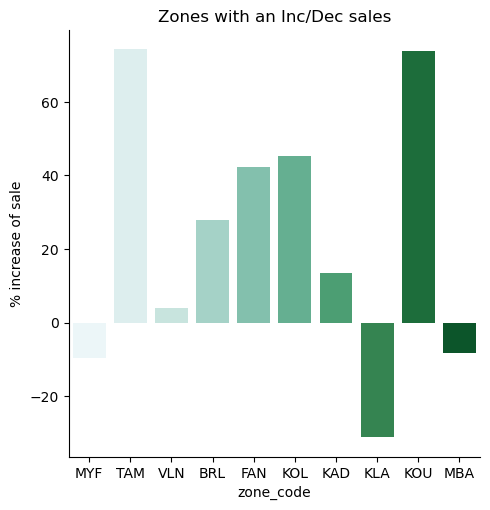

In [76]:
# Visualize the sales increase of the top yielding zones
sns.catplot(x='zone_code',y='% increase of sale',data=zonal_increase,kind='bar', palette='BuGn').set(title='Zones with an Inc/Dec sales')

## Conclusion:
- We observed that the price of the packages rose in 2022, while the sales dropped simultaneously in the same year. There could be a potential relation between the two and the increase in price of the packages could be the cause of the drop in sales. A pricing strategy could be worked on to address this concern.

- The data collected classifies for dirty data in terms of analysis with missing values and a significant amount of inconsistencies. Finding a better way to collect data would be instrumental for MyAgro in the years to come, to be able to analyze their business and improve on key areas. Additionally, data collected on a village level from farmers is also considered to be of apocryphal nature, which limits analysis, thus proving it to be redundant.

- Working on collecting more data on relevant aspects of crop growth on a village level, with the help of farmers, would be fructuous in getting more precise insights.

- With the analysis performed over crop and village level, a recommendation that would bring potentially good results would be to combine crops for each zone or village that show good yield in that particular zone or village, in the packages sold by MyAgro.

- Based on our analysis, the trainings conducted by MyAgro are not seeming to be as advantageous as intended. On analysis of the change in use of compost and the yield with the count of trainings attended by the farmers, we do not see a difference in either of the two. Upgrading the functioning of the trainings and structuring them in accordance with the objective of them would be gainful.

- Certain zones seem to not be performing as well as others and have seen plummeting yield and sales. A recommendation would be to scrutinize those zones to better understand what the weak points are.


## References

https://www.myagro.org/

https://blogs.worldbank.org/opendata/fertilizer-prices-expected-remain-higher-longer

https://www.learnpythonwithrune.org/3-steps-to-plot-shooting-incident-in-ny-on-a-map-using-python/